##### The following dataset was released by Aspiring Minds. The study of this dataset is primarily limited to employment outcomes of engineering students disciplines. The following dataset includes various numerical as well as categorical data of candidates. The data provided in the dataset include following features: ID, Salary, Date of Joining, Date of Leaving, Designation, Job City, Gender, Date of Birth, 10th percentage, 10th board, 12th graduation year, 12th percentage, 12th board, College ID, College Tier, DEgree, Specialization, College GPA, College City ID, College City Tier, College State, Graduation Year, English, Logical, Quant, Domain, Computer Programming, Electronics and Semiconductor, Computer Science, Mechanical Engineering, Electrical Engineering, Telecom Engineering, Civil Engineering, Conscientiousness, Agreeableness, Extraversion, Neuroticism and Openess to experience. All these values are provided and analysis is performed to find correlation between these variables and employment outcomes.

In [3]:
import pandas as pd
data = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [4]:
data.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [72]:
remove_col = ['DOJ','DOB',"ID", "CollegeID", "CollegeCityID",'Unnamed: 0','DOL']

plot_col = [i for i in data.columns if i not in remove_col]

In [73]:
len(plot_col)

32

In [74]:
len(num_col)

27

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [76]:
data.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [77]:
data.shape

(3998, 39)

In [84]:
num_col

['ID',
 'Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeID',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [87]:
num_col = list(data.describe().columns)
categorical_col = [i for i in data.columns if i not in num_col]
num_col.remove('ID')
num_col.remove( "CollegeID")
num_col.remove("CollegeCityID")

In [79]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### PDF

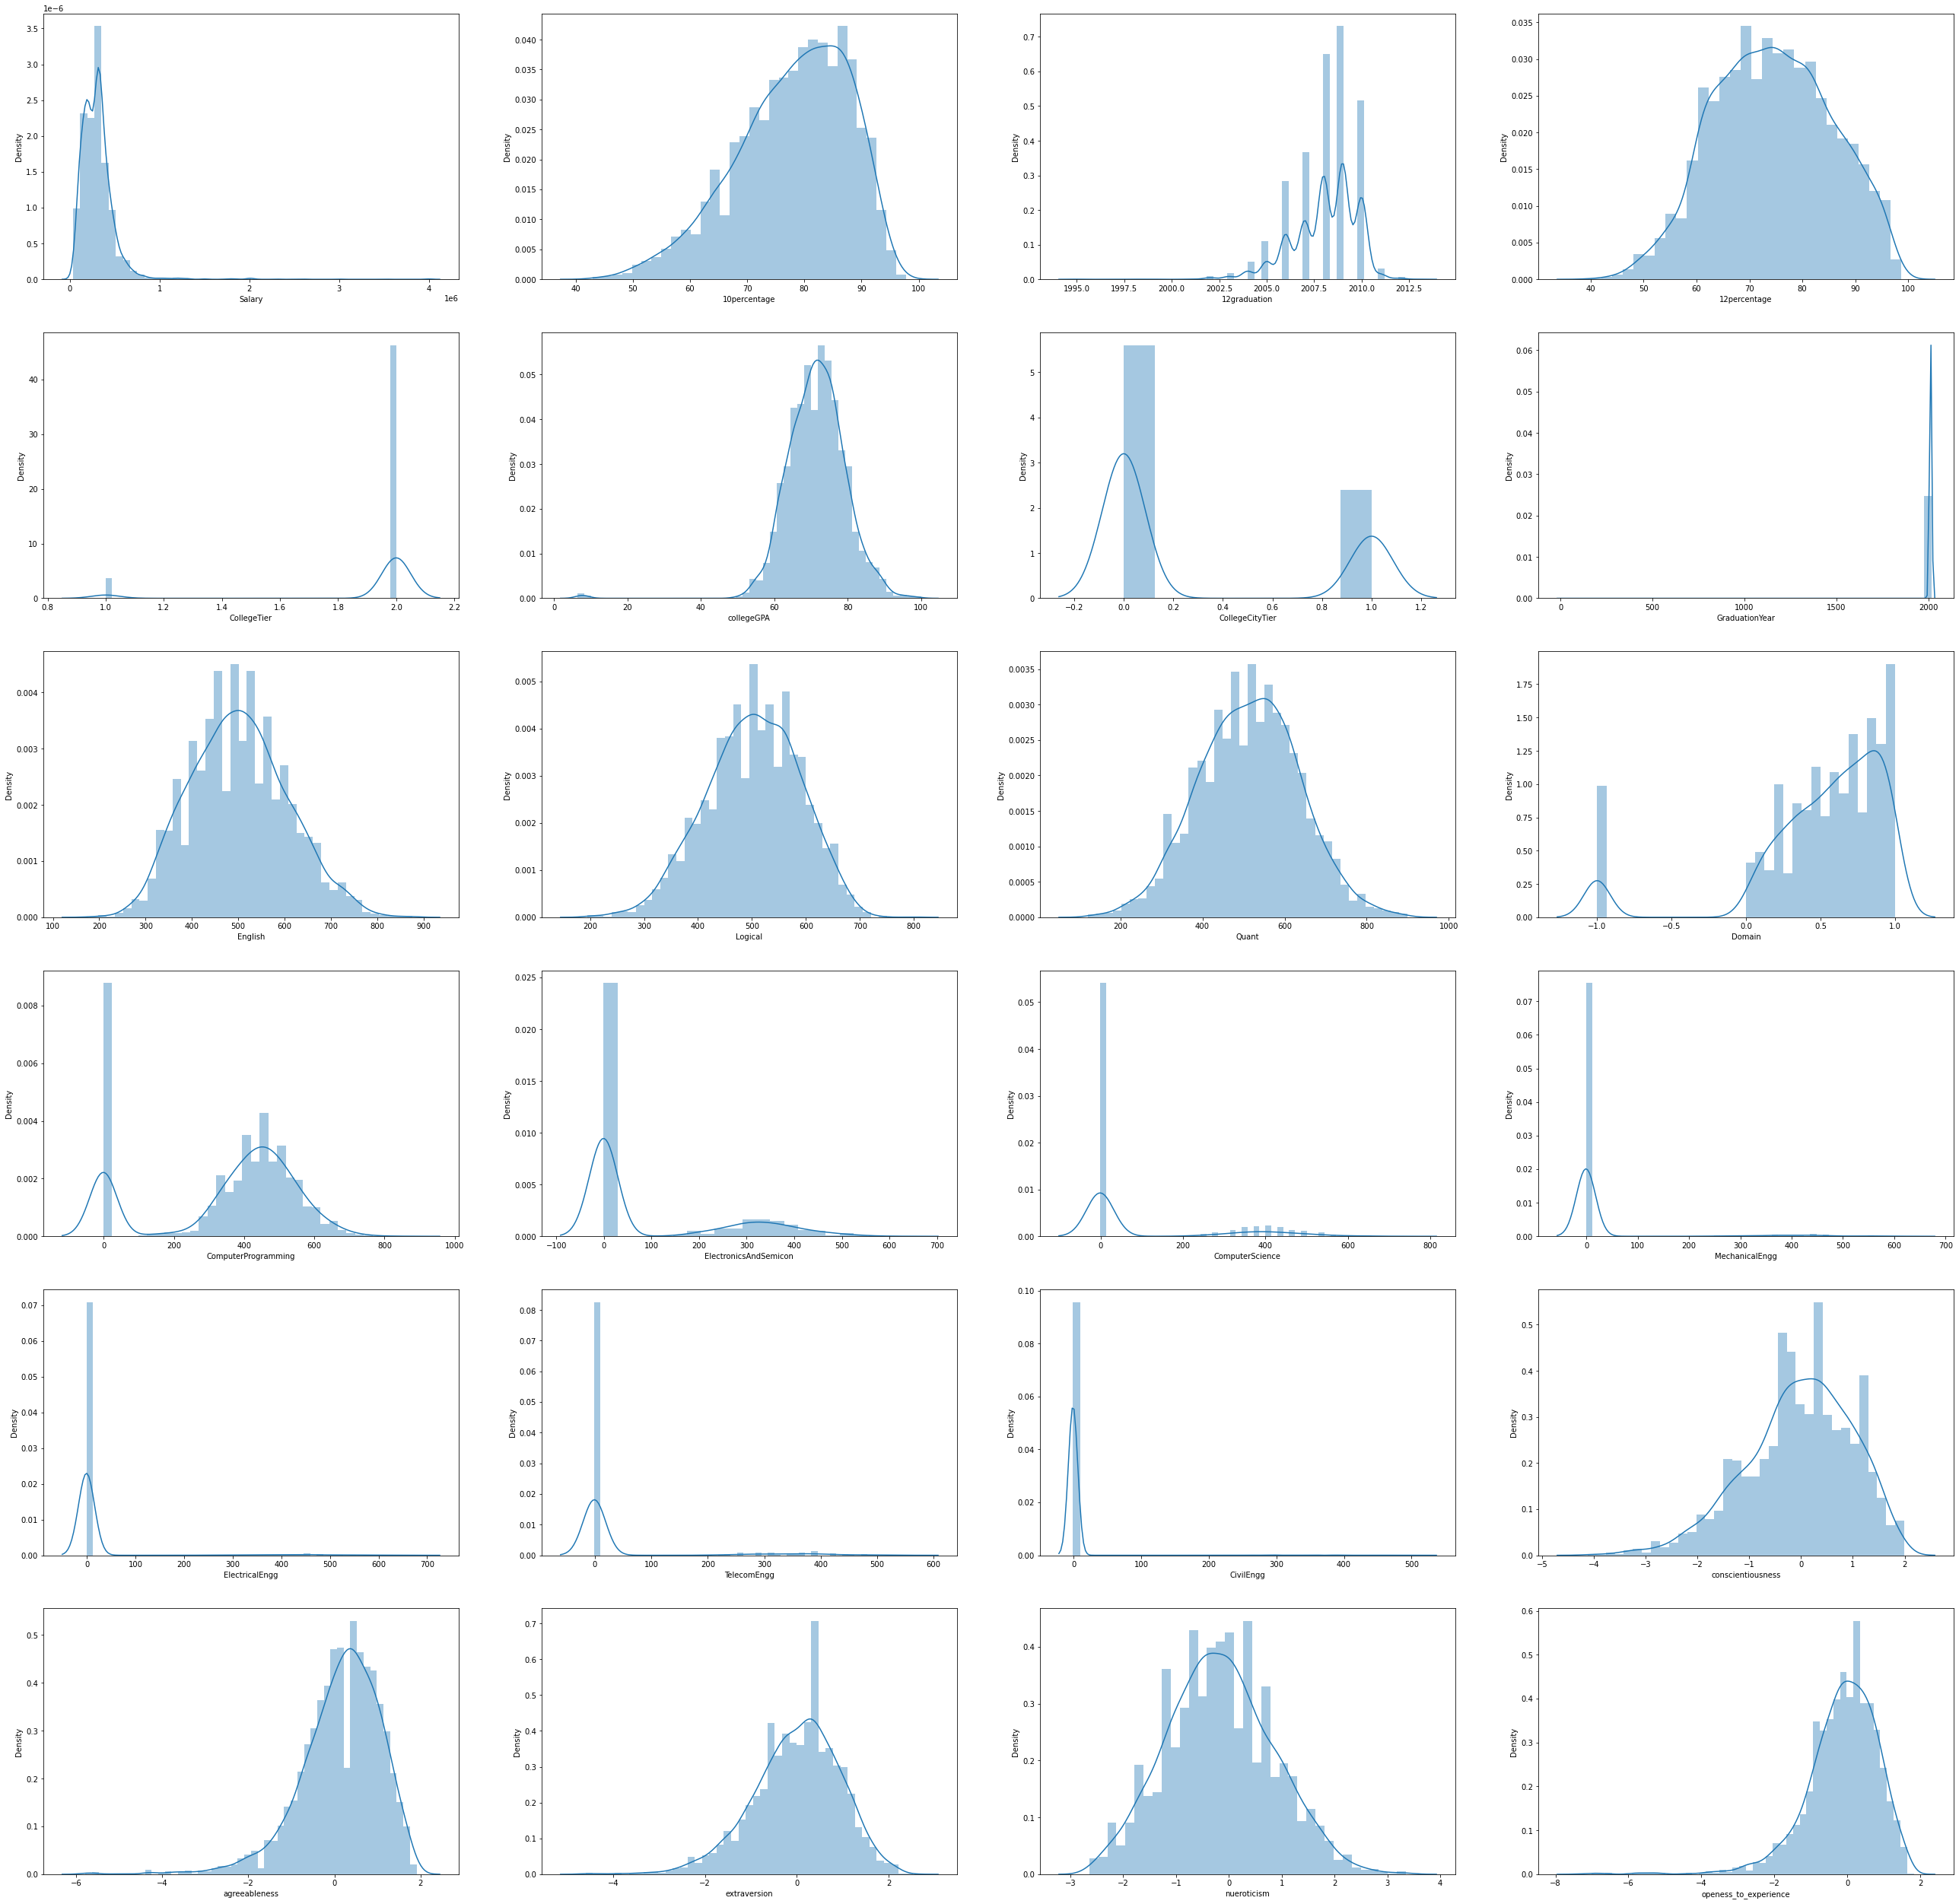

In [88]:
f, ax = plt.subplots(6, 4, sharey=False ,figsize=(45, 45))
j = 0
for i in num_col:
    k = int(j / 4)
    t = j % 4
    sns.distplot(data.loc[:, i], ax=ax[k, t])
    j+=1


plt.show()

1. Log Normal
2. Left Skewed 
4. Close to Normal Distribution
6. Gaussian
7. 2 Uniform distribution
9. Gaussian
10. Gaussian
11.  Gaussian
20. Left Skewed
21. Left Skewed
22. Normal
23. Normal
24. Left Skewed

### Boxplot

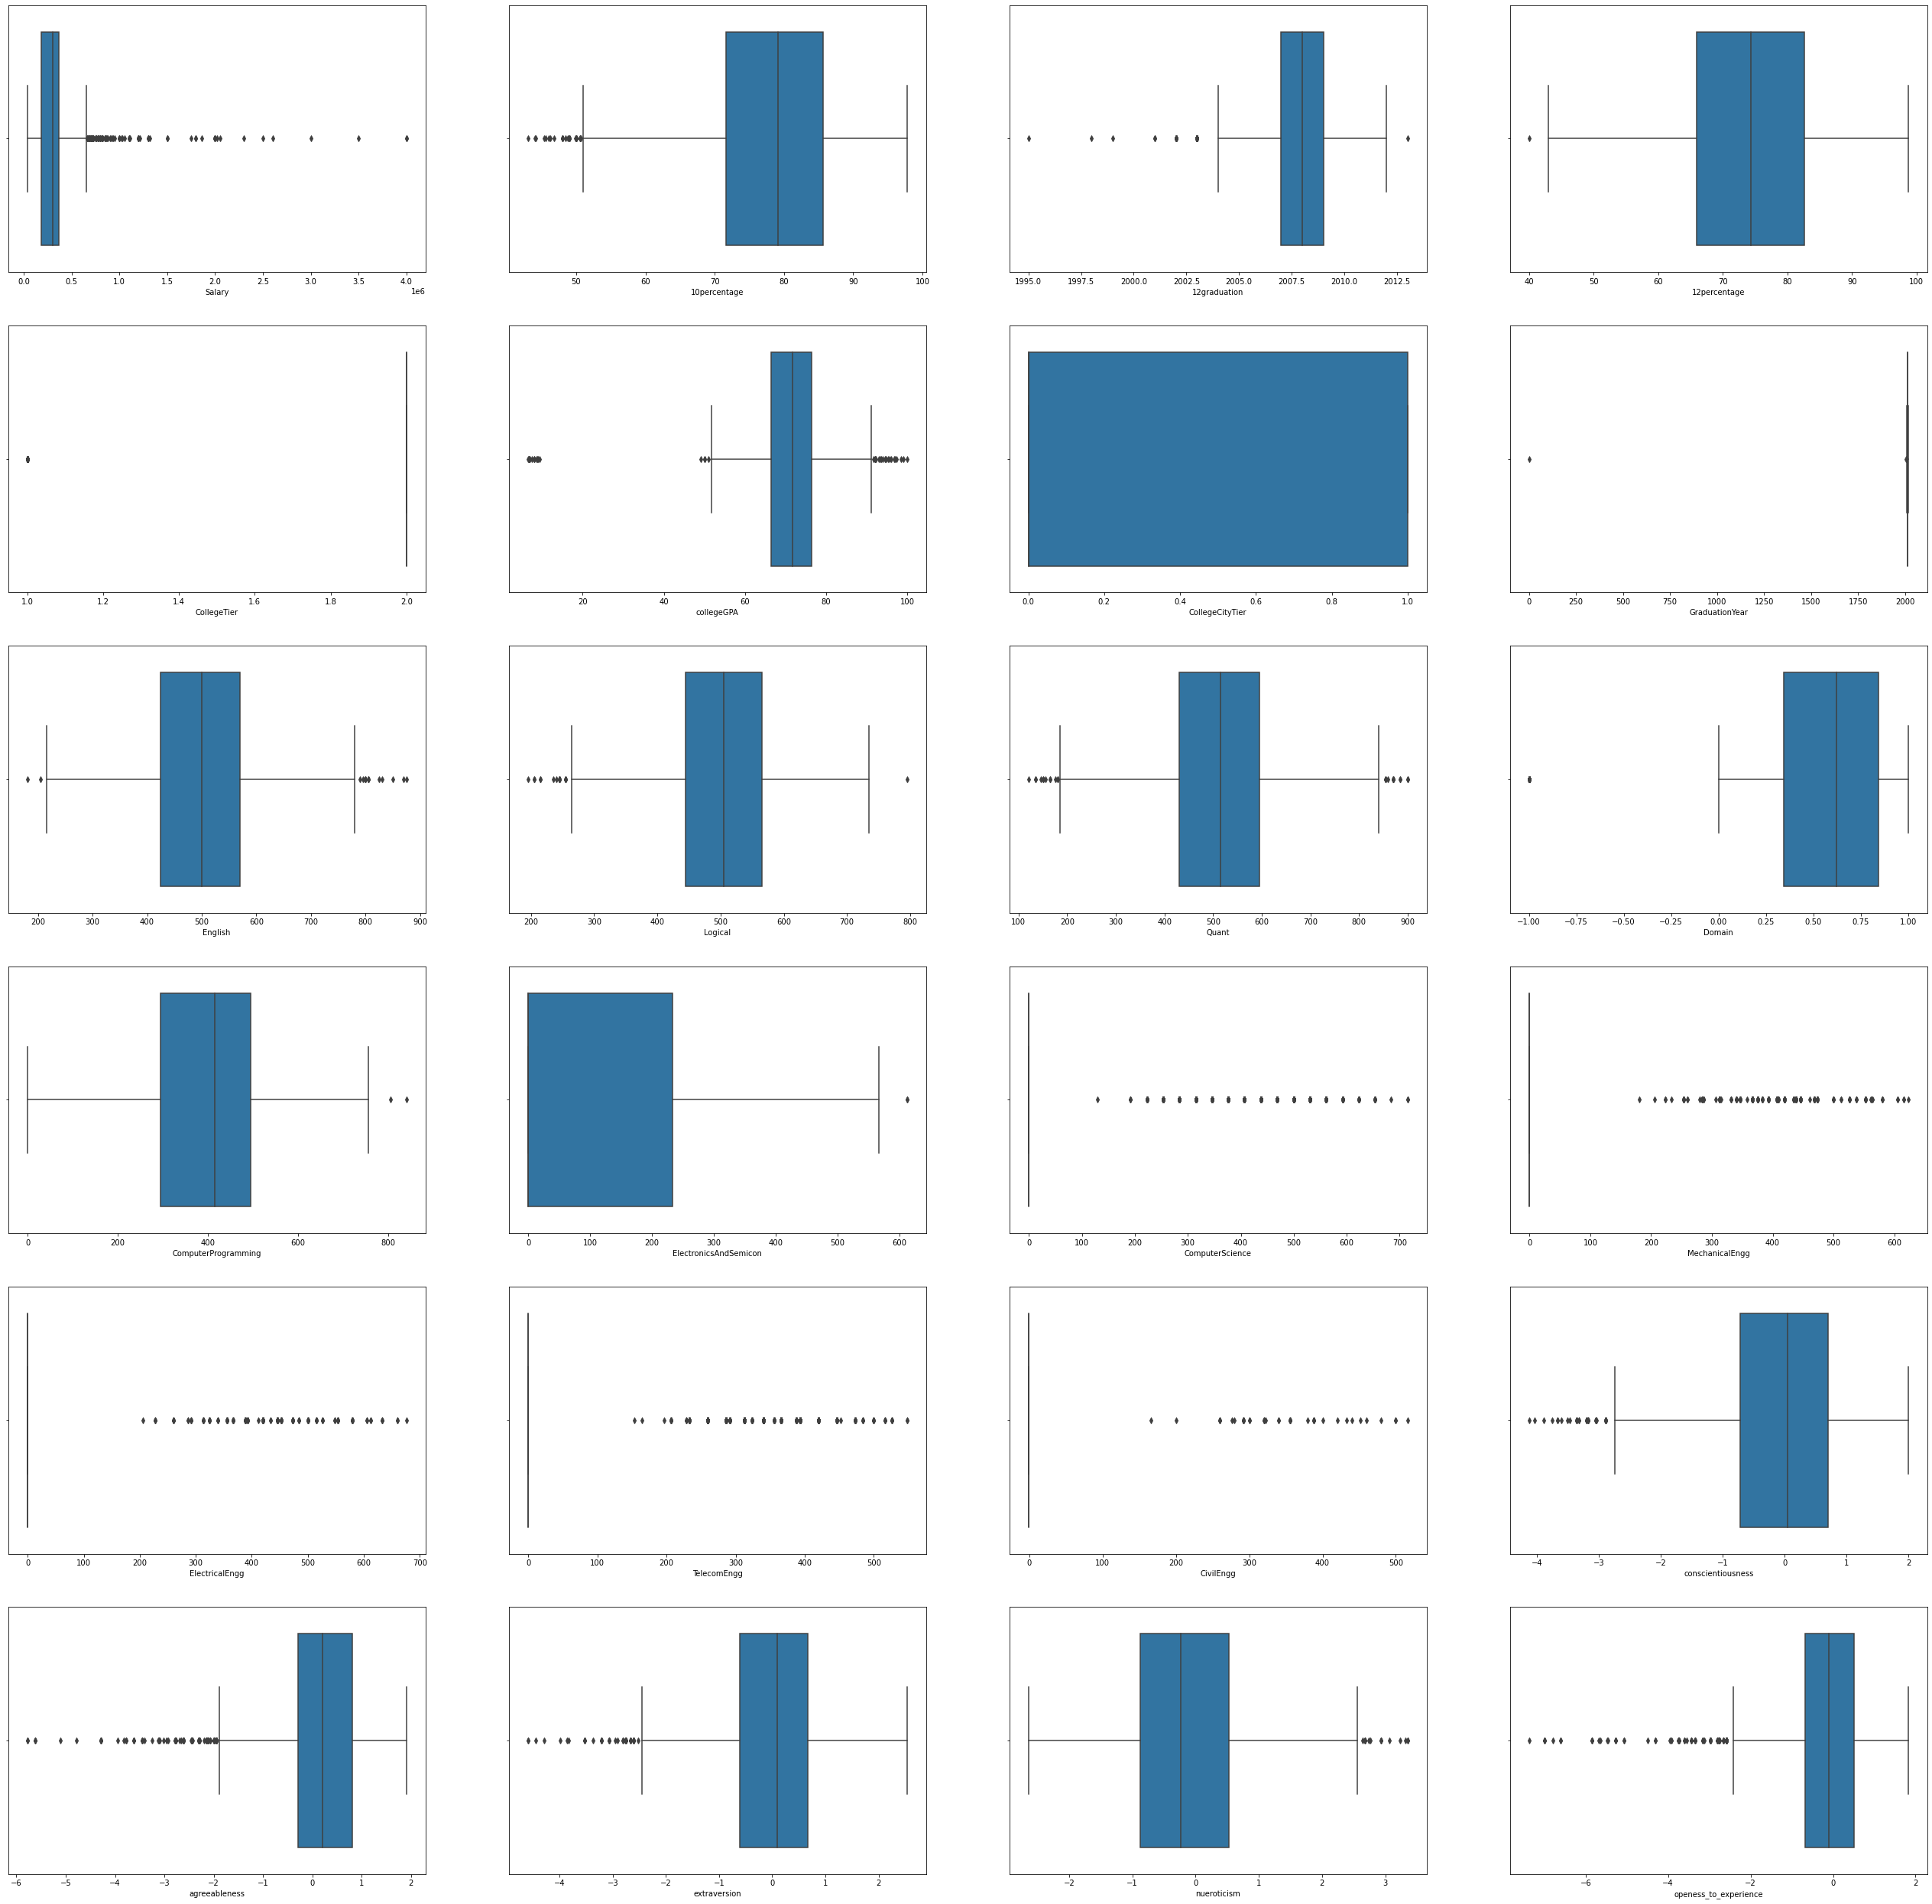

In [91]:
f, ax = plt.subplots(6, 4, sharey=False ,figsize=(45, 45))
j = 0
for i in num_col:
  
    k = int(j / 4)
    t = j % 4
    sns.boxplot(data.loc[:, i], ax=ax[k, t])
    j+=1


plt.show()

##### Graph 1,3,5,8 have visible outliers.

### Histogram

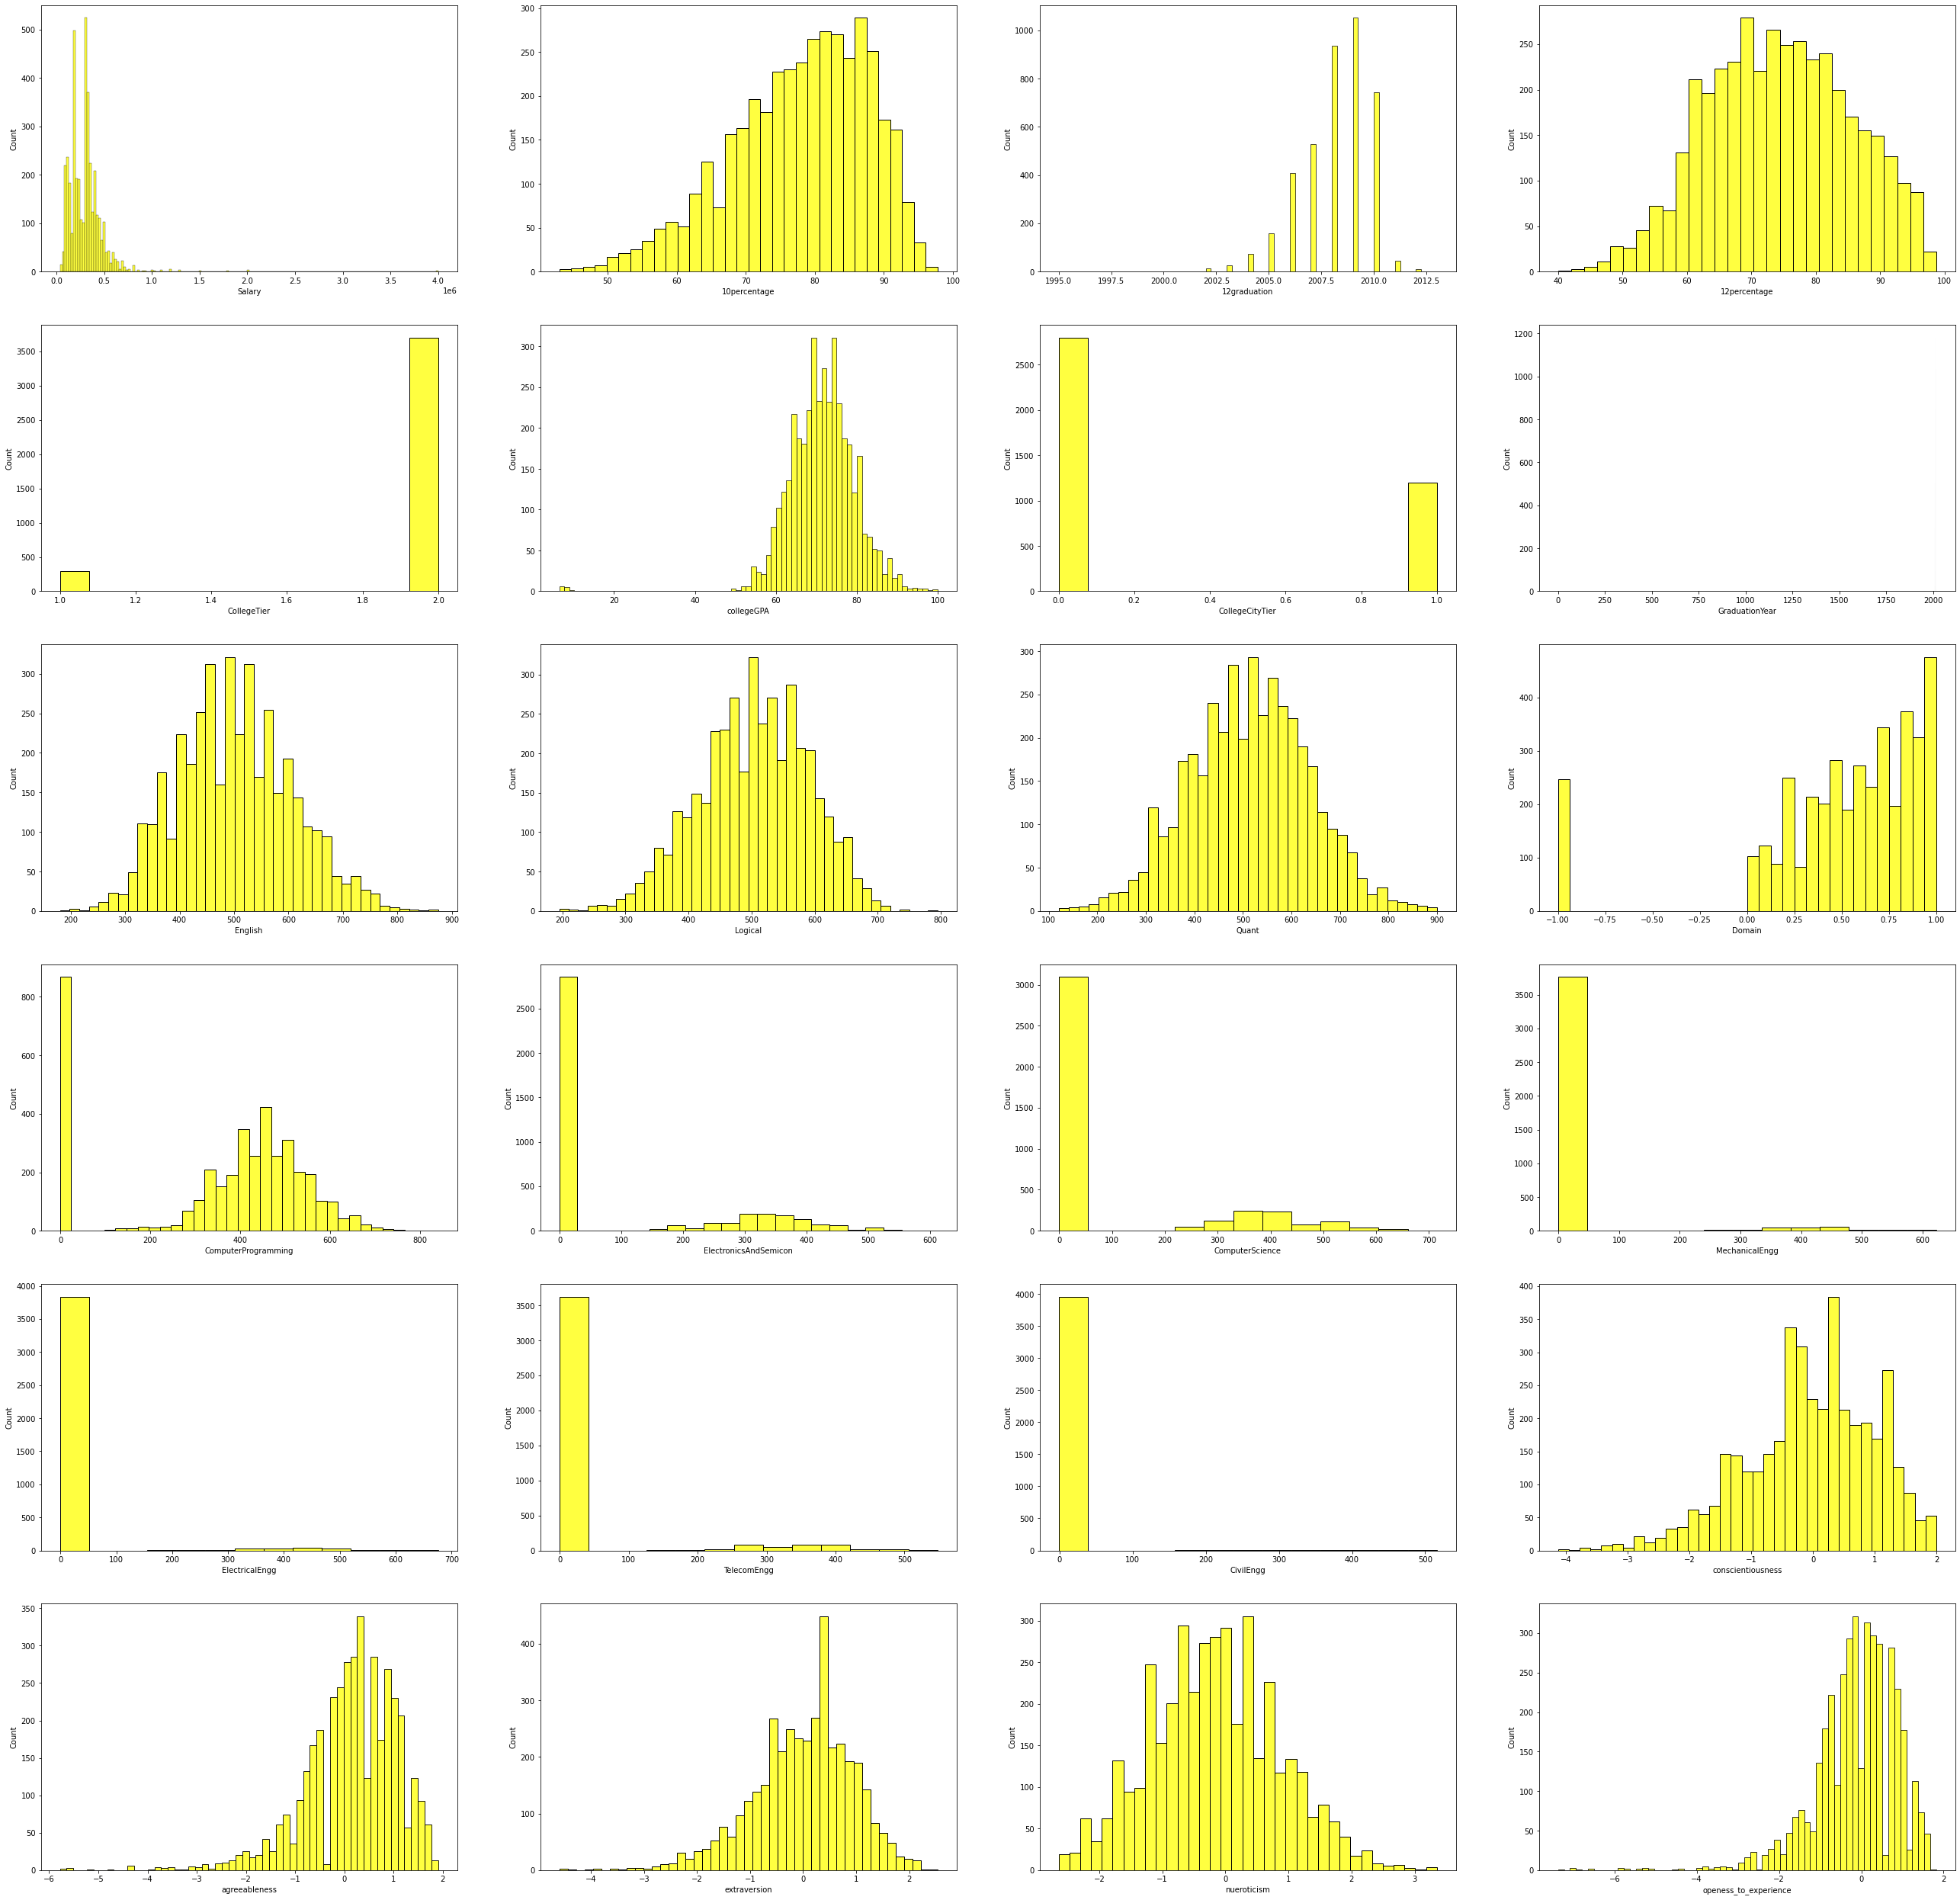

In [92]:
f, ax = plt.subplots(6, 4, sharey=False ,figsize=(45, 45))
j = 0
for i in num_col:
    k = int(j / 4)
    t = j % 4
    sns.histplot(data.loc[:, i], ax=ax[k, t],color='yellow')
    j+=1

plt.show()

### Countplots

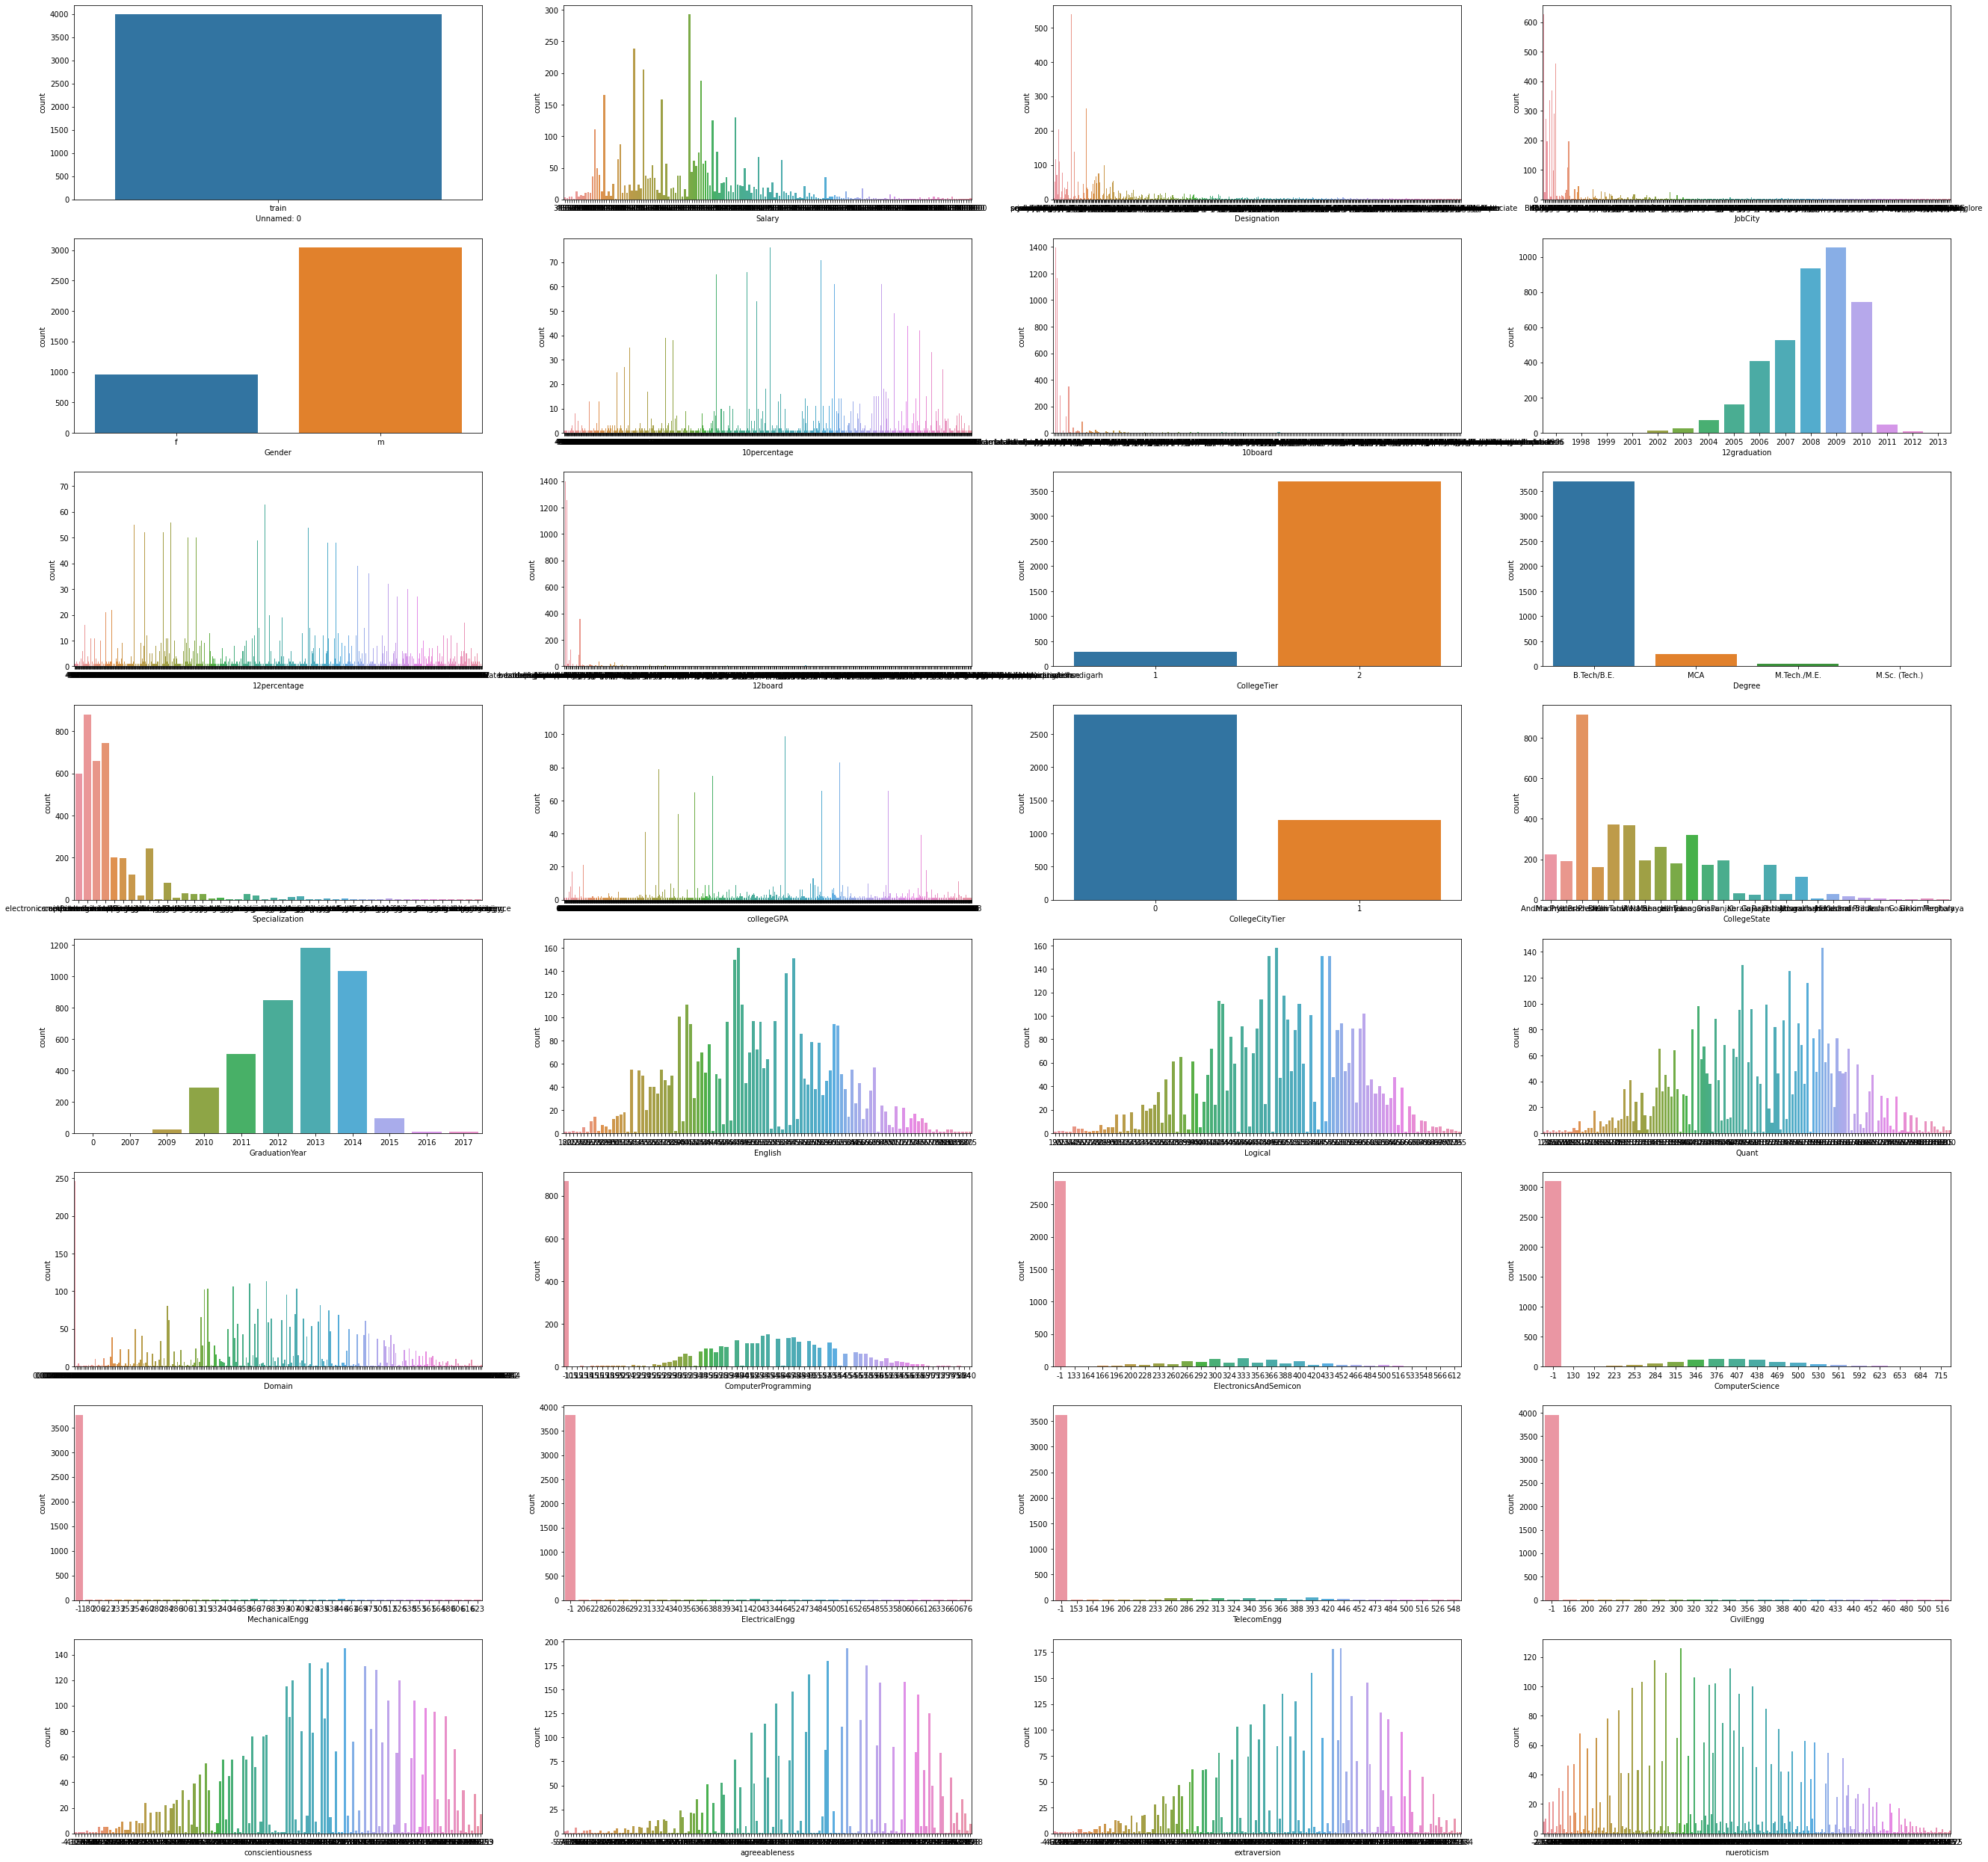

In [63]:
f, ax = plt.subplots(len(plot_col)//4, 4, sharey=False ,figsize=(45, 45))
j = 0
for i in plot_col:
  try:
    k = int(j / 4)
    t = j % 4
    sns.countplot(data.loc[:, i], ax=ax[k, t])
    
    j+=1
  except:
    continue

plt.show()

<Figure size 432x288 with 0 Axes>

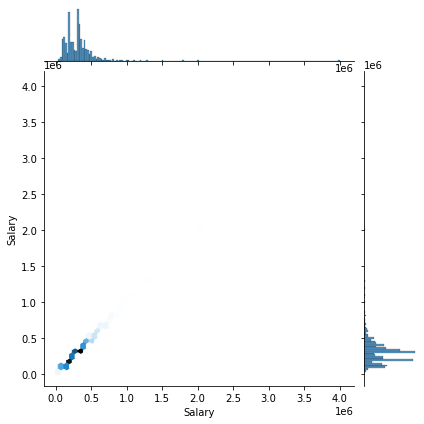

<Figure size 432x288 with 0 Axes>

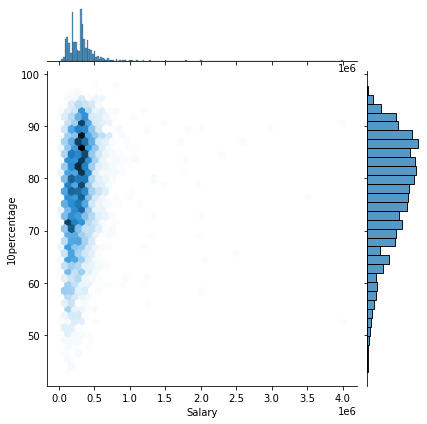

<Figure size 432x288 with 0 Axes>

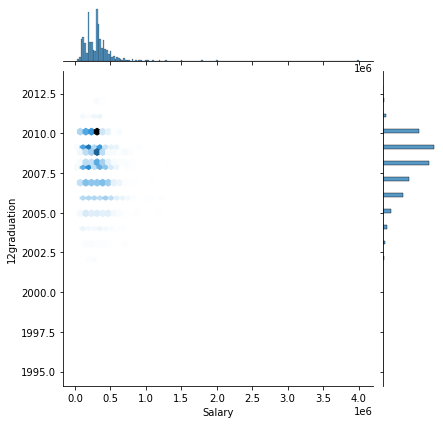

<Figure size 432x288 with 0 Axes>

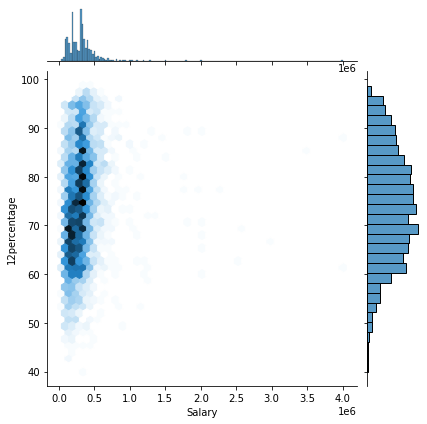

<Figure size 432x288 with 0 Axes>

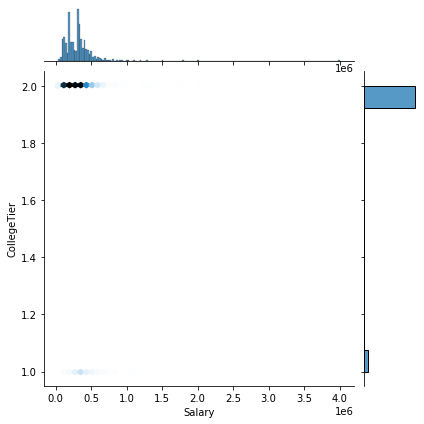

<Figure size 432x288 with 0 Axes>

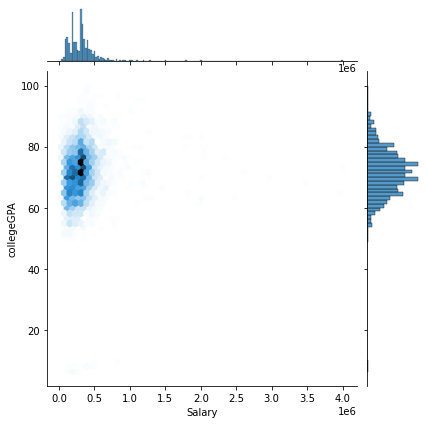

<Figure size 432x288 with 0 Axes>

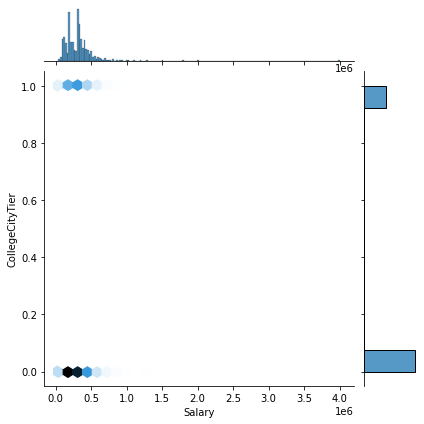

<Figure size 432x288 with 0 Axes>

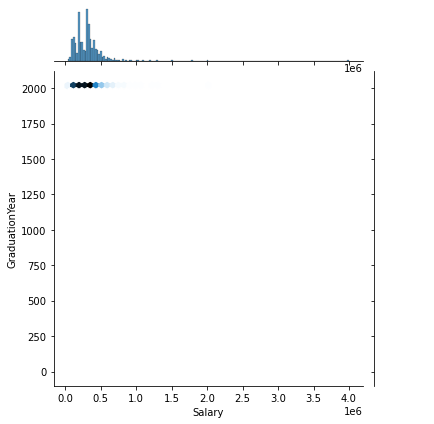

<Figure size 432x288 with 0 Axes>

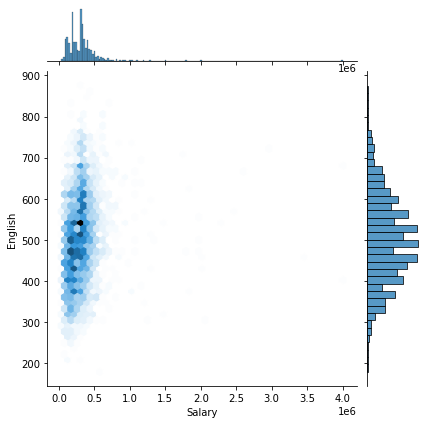

<Figure size 432x288 with 0 Axes>

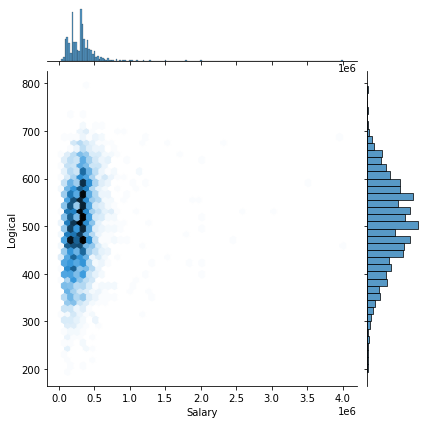

<Figure size 432x288 with 0 Axes>

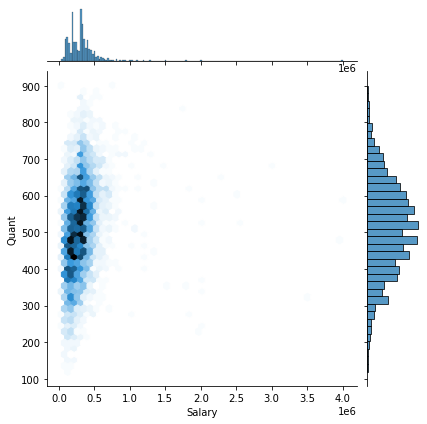

<Figure size 432x288 with 0 Axes>

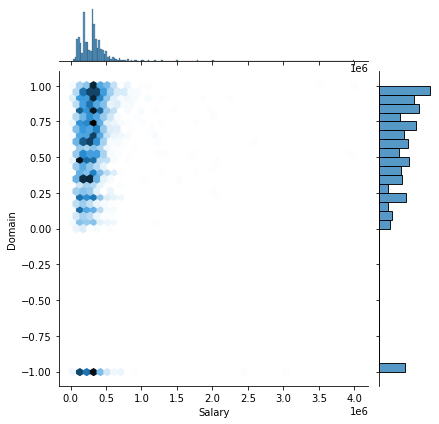

<Figure size 432x288 with 0 Axes>

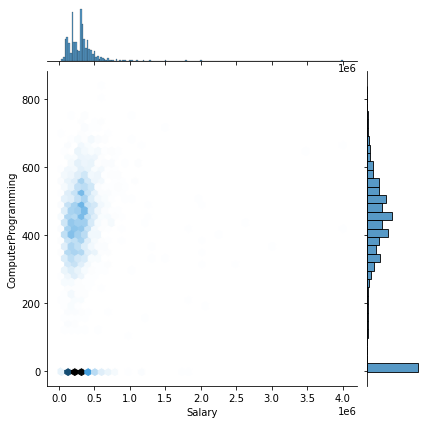

<Figure size 432x288 with 0 Axes>

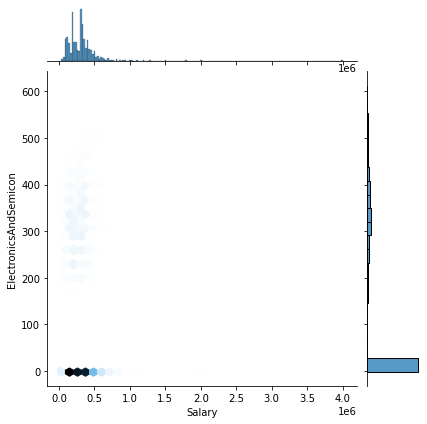

<Figure size 432x288 with 0 Axes>

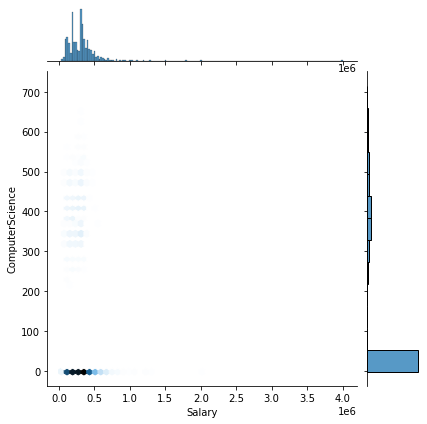

<Figure size 432x288 with 0 Axes>

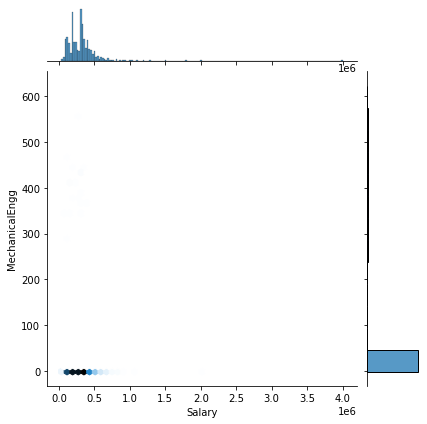

<Figure size 432x288 with 0 Axes>

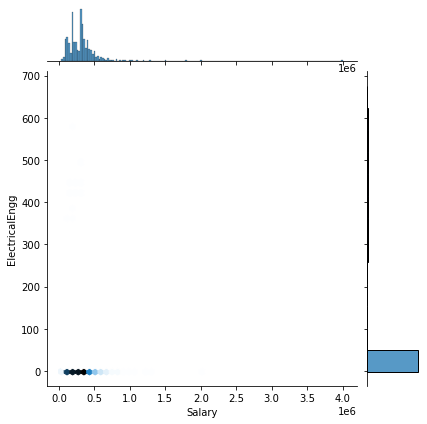

<Figure size 432x288 with 0 Axes>

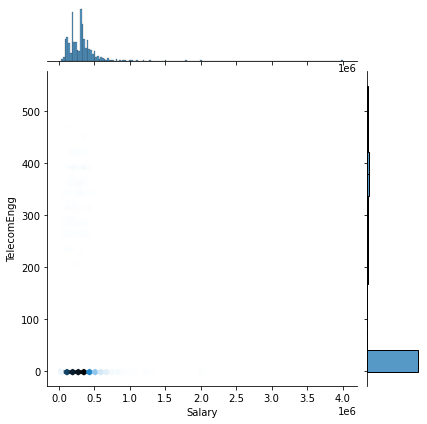

<Figure size 432x288 with 0 Axes>

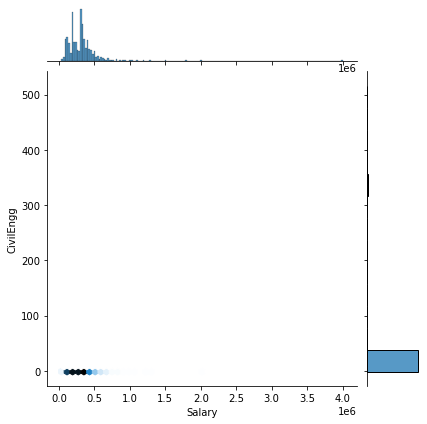

<Figure size 432x288 with 0 Axes>

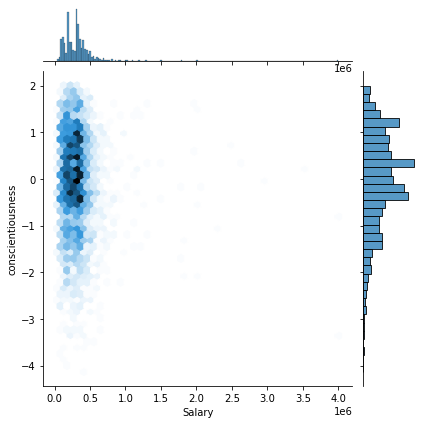

<Figure size 432x288 with 0 Axes>

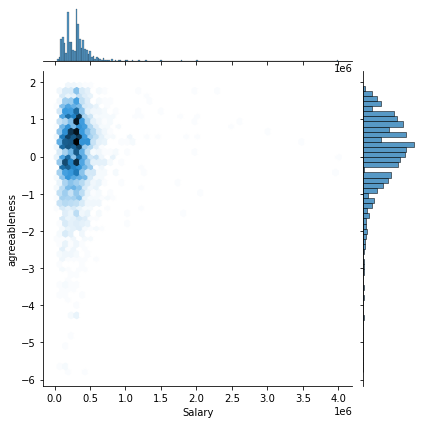

<Figure size 432x288 with 0 Axes>

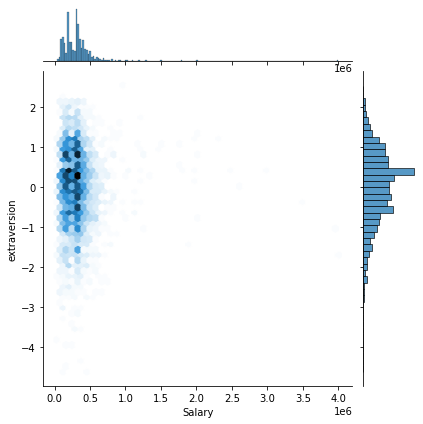

<Figure size 432x288 with 0 Axes>

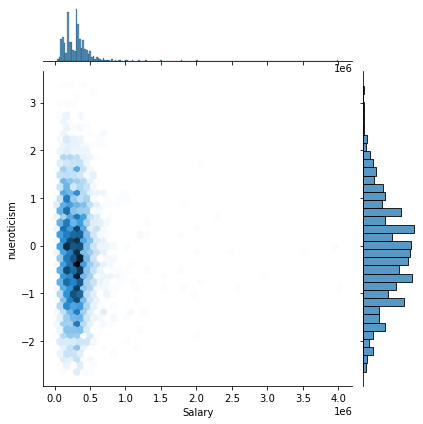

<Figure size 432x288 with 0 Axes>

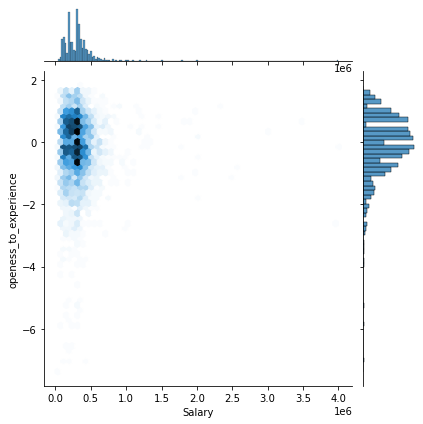

In [94]:
for i in num_col:
  
    plt.figure()
    sns.jointplot(data.loc[:, "Salary"], data.loc[:, i], kind="hex")
    plt.show()


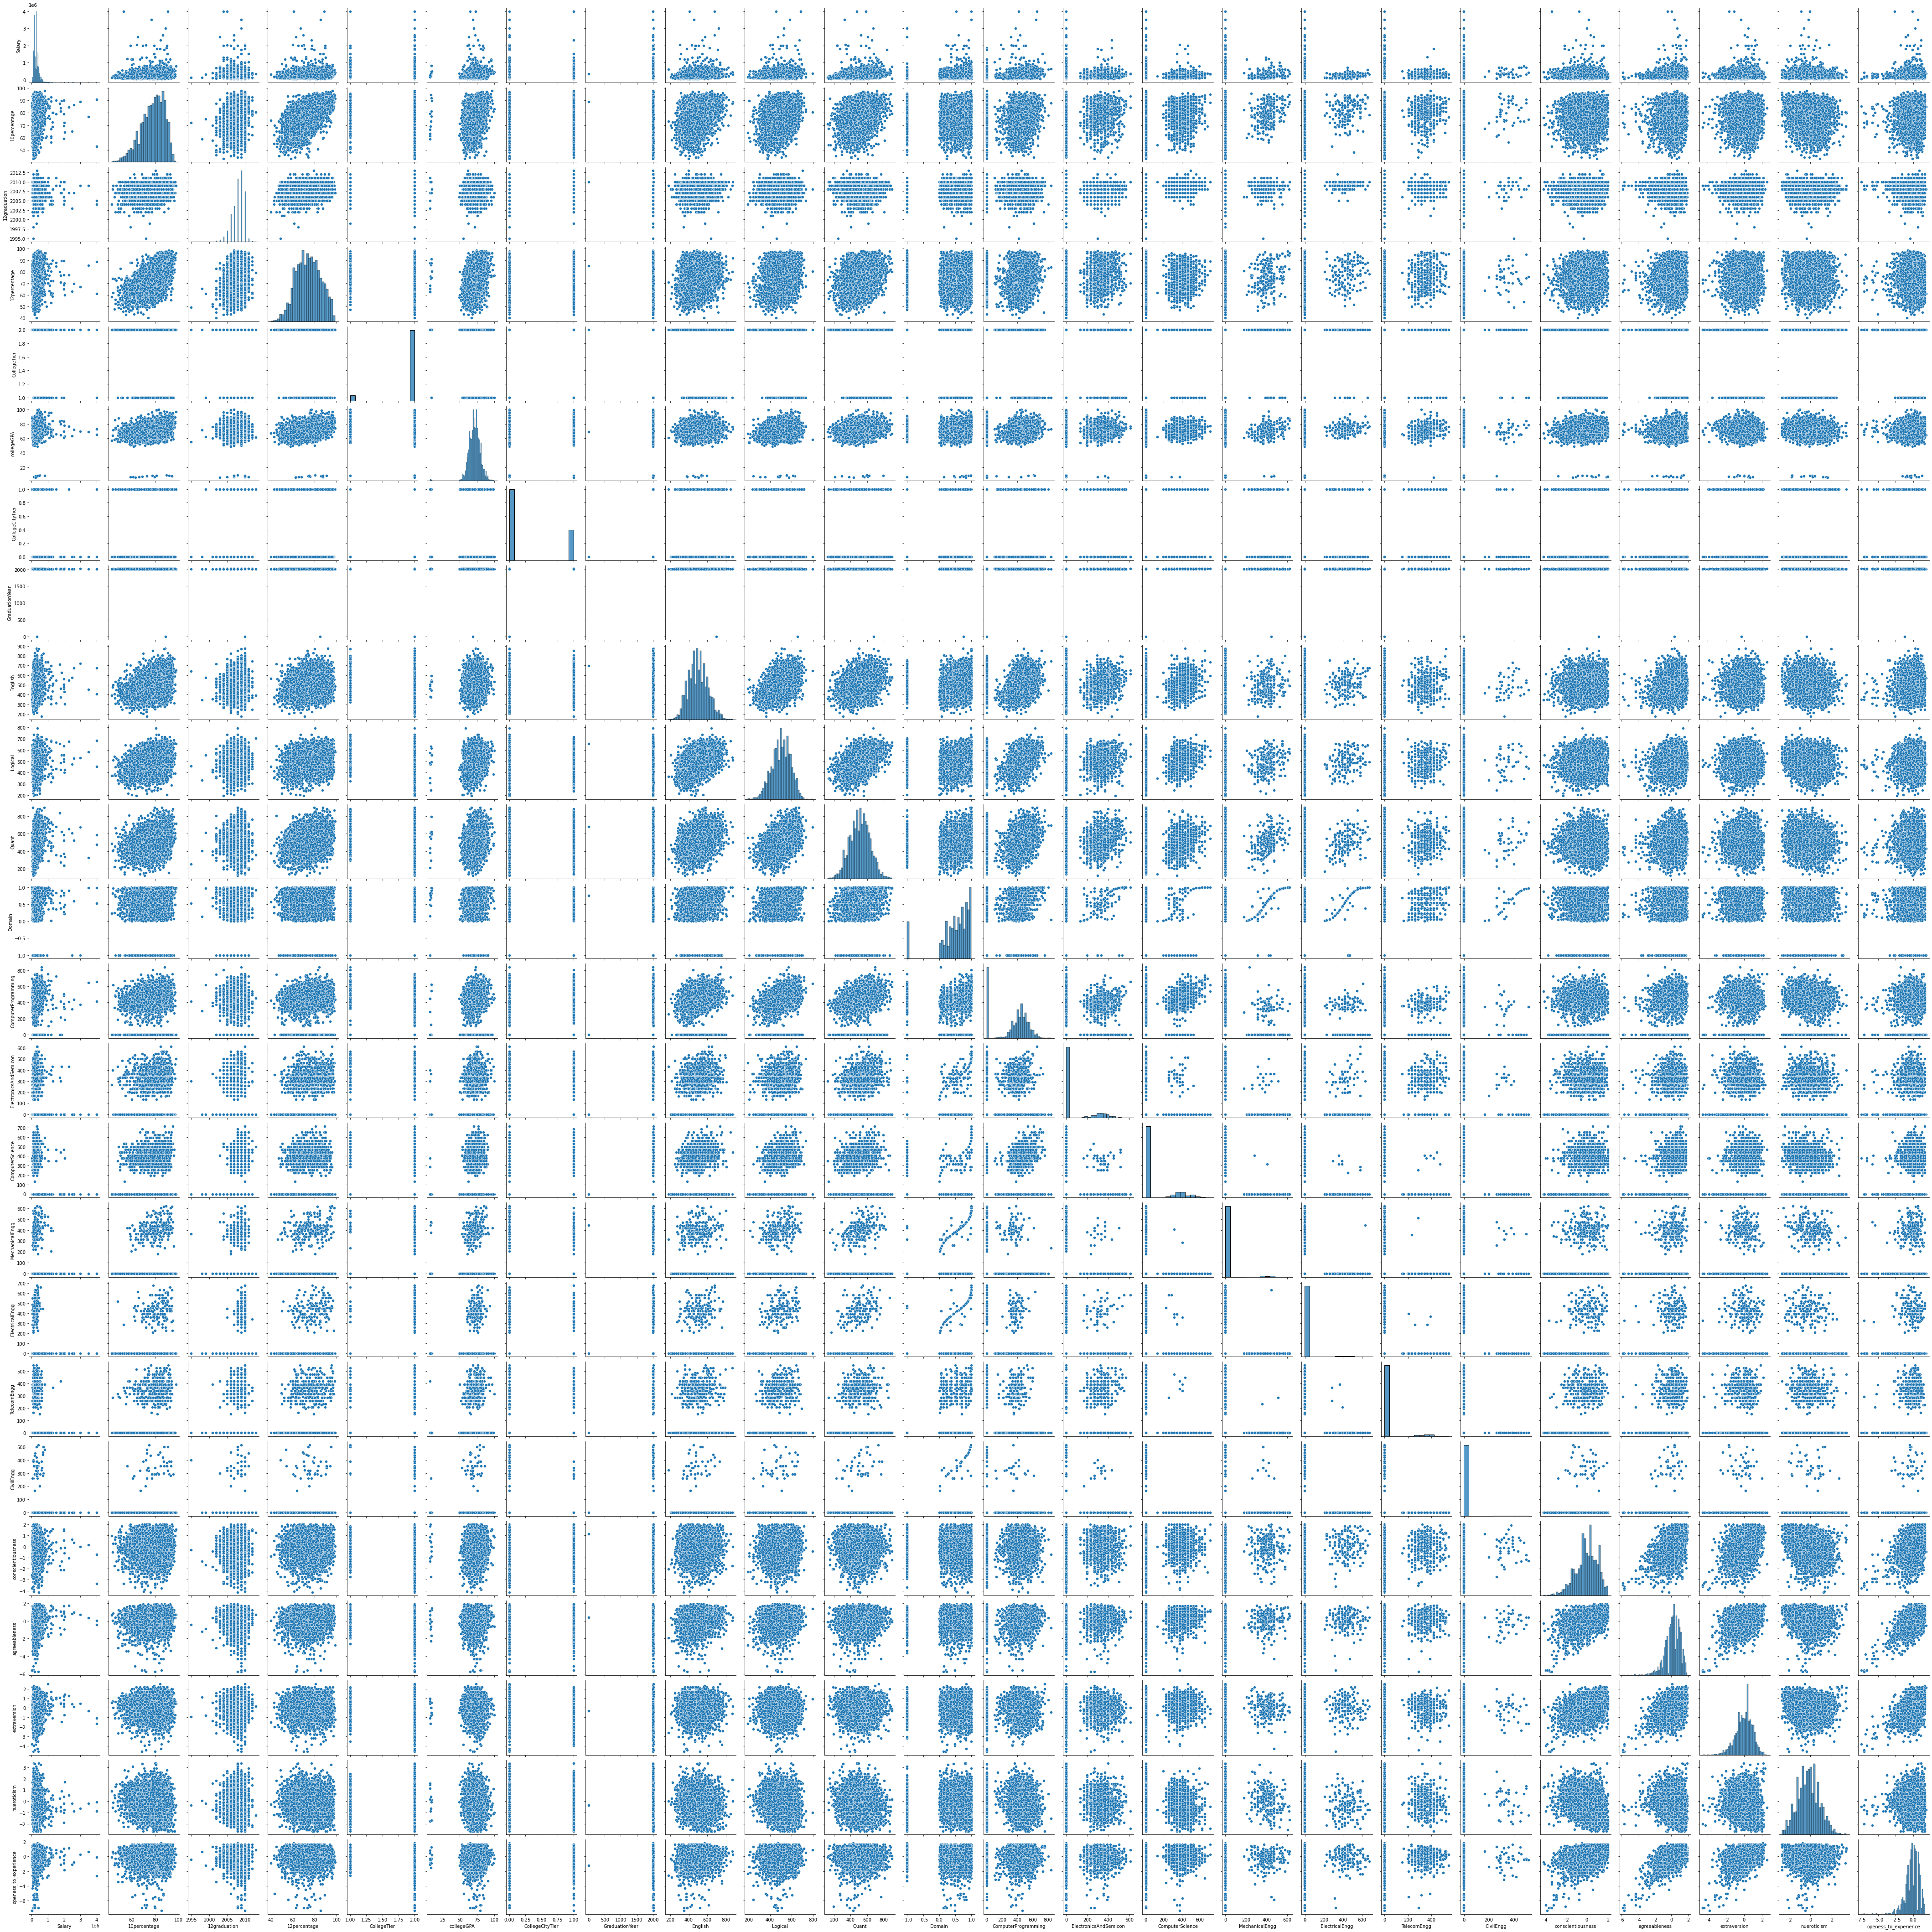

In [96]:
sns.pairplot(data.loc[:, plot_col])

In [ ]:
f, ax = plt.subplots(6, 4, sharey=False ,figsize=(30, 30))
j = 0
for i in num_col:
  
    k = int(j / 4)
    t = j % 4
    sns.scatterplot(dataset.loc[:, i], dataset.loc[:, "Salary"], ax=ax[k, t]).set_title(f"{i} vs Salary")
    j+=1

plt.show()